<a href="https://colab.research.google.com/github/Ekta-2201/email_filtering/blob/main/emailspam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

In [ ]:
#load data
from google.colab import files
uploaded =files.upload()

Saving spam.csv to spam.csv


In [ ]:
#read csv
df=pd.read_csv('spam.csv')

In [ ]:
#print the shape
df.shape

(5169, 5)

In [ ]:
#get the columnn names
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
df.drop_duplicates(inplace=True)

df.drop_duplicates(inplace =True)

In [ ]:
df.shape

(5169, 5)

In [ ]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

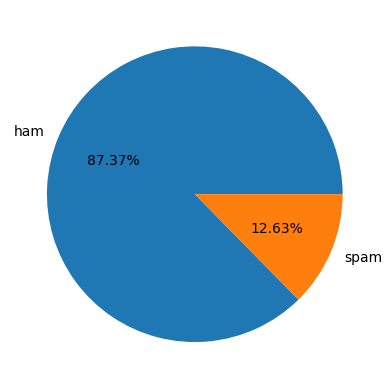

In [ ]:
import matplotlib.pyplot as plt

plt.pie((df['v1']).value_counts(), labels=['ham','spam'], autopct='%0.2f%%')
plt.show()

In [ ]:
#download the stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def process_text(v2):
  #1 remove punctuation
  #2 remove stopwords
  #return a list of clean text words

  #1
  nopunc=[char for char in v2 if char not in string.punctuation]
  nopunc=''.join(nopunc)
  #2
  clean_words=[word for word in nopunc.split() if word.lower()not in stopwords.words('english')]
  #3
  return clean_words

In [ ]:
#show the tokenization( a list of token also lemmas)
df["v2"].head().apply(process_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: v2, dtype: object

In [ ]:
#convert a collection of text to a matrix of tokens

from sklearn.feature_extraction.text import CountVectorizer
message_bow=CountVectorizer(analyzer=process_text).fit_transform(df['v2'])

In [ ]:
#split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(message_bow,df['v1'],test_size=0.20,random_state=0)


In [ ]:
#get the shape of message_bow
message_bow.shape

(5572, 11304)

In [ ]:
#create and train the naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB().fit(X_train,y_train)

In [ ]:
#print the prediction
print(classifier.predict(X_train))

#print the actual values
print(y_train.values)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
1114     ham
3589     ham
3095     ham
1012     ham
3320     ham
        ... 
4931     ham
3264    spam
1653     ham
2607     ham
2732     ham
Name: v1, Length: 4457, dtype: object


In [ ]:
#evaluate the model on the training dataset
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred=classifier.predict(X_train)
print(classification_report(y_train,pred))
print()
print(confusion_matrix(y_train,pred))
print()
print(accuracy_score(y_train,pred))



              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3876
        spam       0.98      0.98      0.98       581

    accuracy                           0.99      4457
   macro avg       0.99      0.99      0.99      4457
weighted avg       0.99      0.99      0.99      4457


[[3864   12]
 [  12  569]]

0.9946152120260264


In [ ]:
#print the prediction
print(classifier.predict(X_test))

#print the actual values
print(y_test.values)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [ ]:
#evaluate the model on the training dataset
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred=classifier.predict(X_test)
print(classification_report(y_test,pred))
print()
print(confusion_matrix(y_test,pred))
print()
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

         ham       0.99      0.96      0.97       949
        spam       0.81      0.93      0.87       166

    accuracy                           0.96      1115
   macro avg       0.90      0.95      0.92      1115
weighted avg       0.96      0.96      0.96      1115


[[914  35]
 [ 12 154]]

0.957847533632287


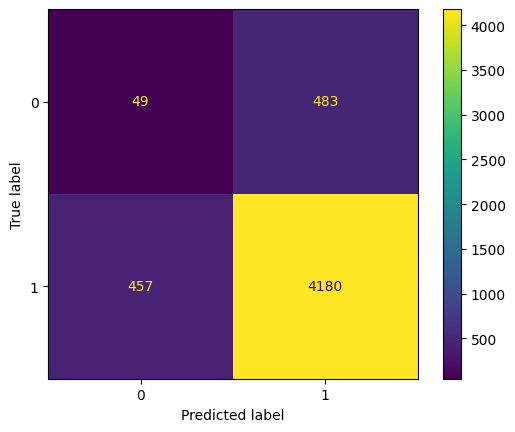

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 5169)
predicted = numpy.random.binomial(1,.9,size = 5169)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()